### Student Information
Name: 張誠晉

Student ID: 110062609

GitHub ID: immersec

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

## 1.
**Exercise 2**

In [14]:
#import libraries we need
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import helpers.data_mining_helpers as dmh

# categories
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target
# add category label
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
#Few tries
print(X.sample(frac = 0.01))
print(X.iat[10,2])
print(X.loc[10].iat[2])
print(X[X['category'] == 1][0:1])
print(X.isin(['comp.graphics'])[0:10])

                                                   text  category  \
305   From: livesey@solntze.wpd.sgi.com (Jon Livesey...         0   
1159  From: rgc3679@bcstec.ca.boeing.com (Robert G. ...         1   
1470  From: brein@jplpost.jpl.nasa.gov (Barry S. Rei...         2   
500   From: qpliu@phoenix.Princeton.EDU (q.p.liu) Su...         0   
925   From: tdawson@engin.umich.edu (Chris Herringsh...         1   
1743  Subject: E-mail of Michael Abrash? From: gmont...         1   
1301  From: mussack@austin.ibm.com (Christopher Muss...         3   
1914  From: sbrenner@cbnewsb.cb.att.com (scott.d.bre...         2   
1806  From: mscrap@halcyon.com (Marta Lyall) Subject...         1   
1761  From: sigma@rahul.net (Kevin Martin) Subject: ...         1   
1809  From: julie@eddie.jpl.nasa.gov (Julie Kangas) ...         2   
798   From: uabdpo.dpo.uab.edu!gila005 (Stephen Holl...         2   
1232  From: uk02183@nx10.mik.uky.edu (bryan k willia...         1   
219   From: livesey@solntze.wpd.sg

**Exercise 5**

In [15]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
print(NA_df)
NA_df['missing_example'].isnull()

  id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F                


0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

Apparently, the function `.isnull()` is not working.  
We can see that as long as there is text in it, it is regarding as a legal value, even if the text is 'NaN', 'None' or blank.  
It has to be no text, np.nan or real None, that `.isnull()` will regard it as missing value.

**Exercise 6**

In [16]:
X_sample = X.sample(n=1000)
# want to check the order of X_sample
print(X[0:4])
print(X_sample[0:4])
print(len(X_sample))

                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
3  soc.religion.christian  
                                                   text  category  \
768   From: nfotis@ntua.gr (Nick C. Fotis) Subject: ...         1   
845   From: ktt3@unix.brighton.ac.uk (Koon Tang) Sub...         1   
1635  From: marka@hcx1.ssd.csd.harris.com (Mark Ashl...         3   
879   Subject: Technical Help Sought From: jiu1@husc...         1   

               category_name  
768            comp.graphics  
845            comp.graphics  
1635  soc.religion.christian  
879            comp.graphics  
1000


The data `X_sample` generated by `.sample()` is not in the original order.  
And the length become the number n we set.

**Exercise 8**

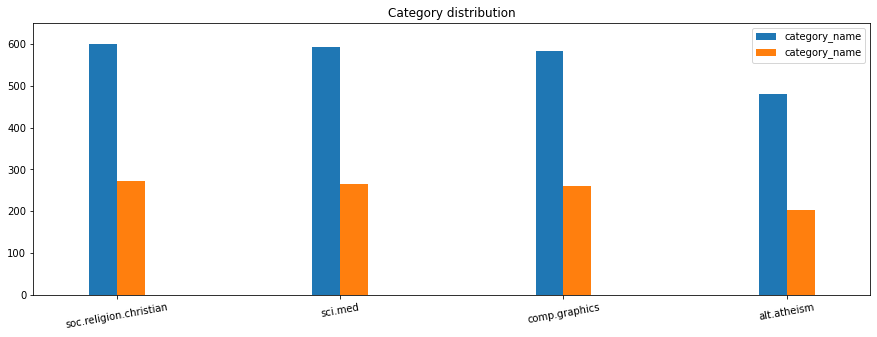

In [18]:
result_combined_df = pd.concat([X.category_name.value_counts(),
                                X_sample.category_name.value_counts()], axis=1).plot(kind = 'bar',
                                                                                     title = 'Category distribution',
                                                                                     ylim = [0, 650], width = 0.25,        
                                                                                     rot = 10, fontsize = 10, figsize = (15,5))

**Exercise 10**

In [19]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')
# takes a like a minute or two to process
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# use where function to get all the positions that value 1 occurs in document 4
tmp = np.where(X_counts[4:5, 0:100].toarray() == 1)
# we want to see which feature is the second 1 represent
print(count_vect.get_feature_names()[tmp[1][1]:tmp[1][1]+1])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ccc87\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['01']


**Exercise 11**

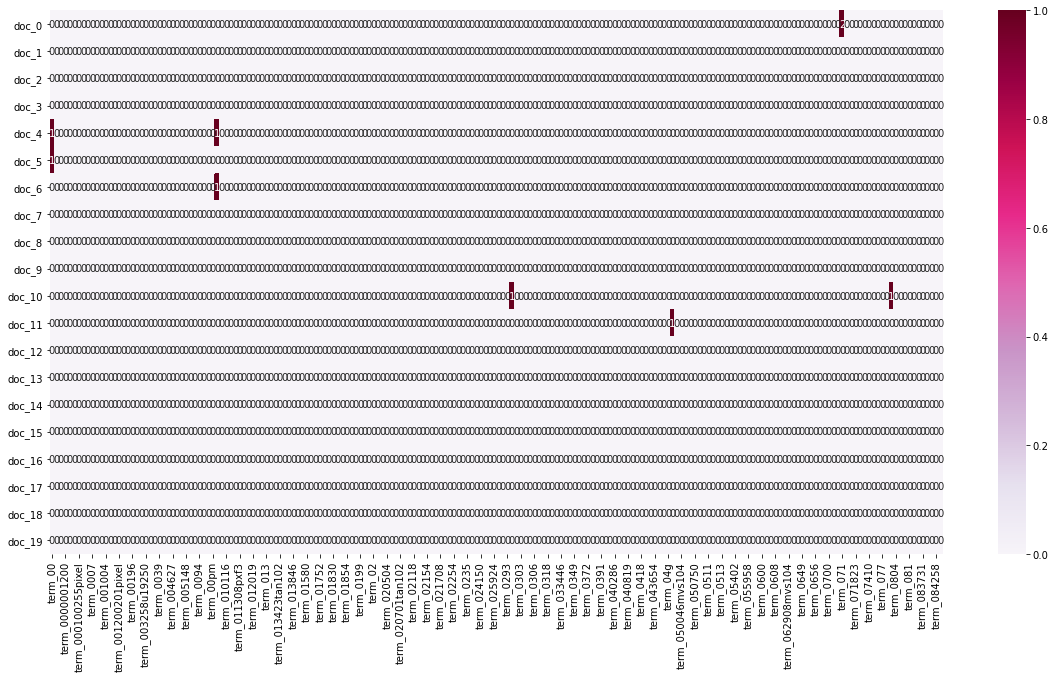

In [20]:
import seaborn as sns
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:200]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:200].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(20, 10))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)
#we only show first 20 document in first 200 term.

**Exercise 12**

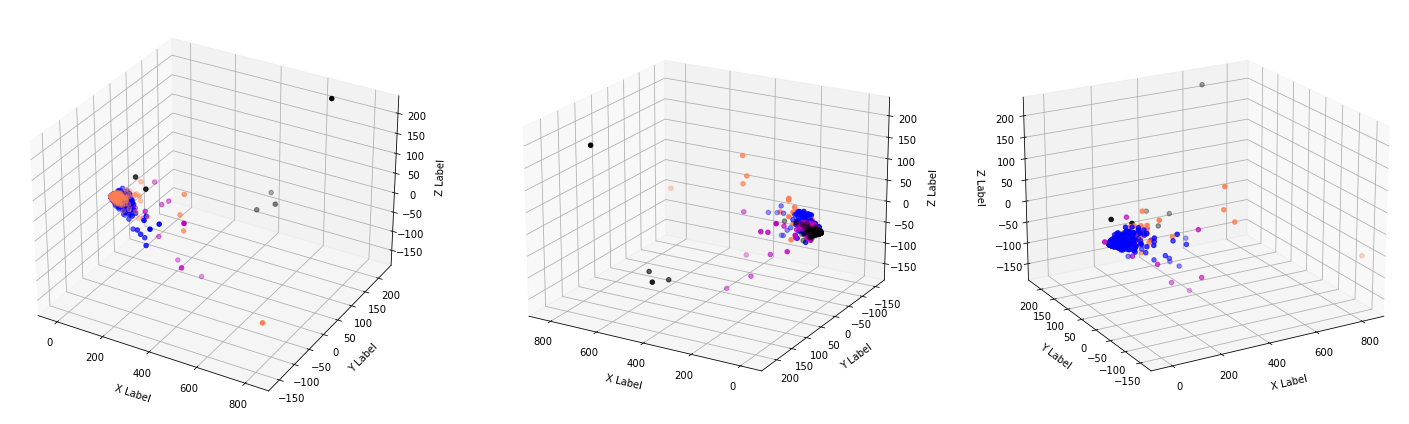

In [22]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
# set each subplot's position
ax = fig.add_subplot(1, 3, 1, projection='3d')
ay = fig.add_subplot(1, 3, 2, projection='3d')
az = fig.add_subplot(1, 3, 3, projection='3d')

for c, category in zip(col, categories):
    xs = X_reduced[X['category_name'] == category].T[0]
    ys = X_reduced[X['category_name'] == category].T[1]
    zs = X_reduced[X['category_name'] == category].T[2]
# ax ay az are actually the same, but we want them to show in different angle
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ay.scatter(xs, ys, zs, c = c, marker='o')
    az.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ay.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')
az.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')
# set the view angle
ay.view_init(elev=20., azim=120)
az.view_init(elev=20., azim=240)
plt.show()

# still not very clear to see a seperation in the data 

**Exercise 13**

In [23]:
# we use plotly for a nicer interactive visualization
import plotly.express as px

term_frequencies = []
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))
    
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
fig.show()

**Exercise 14**

77


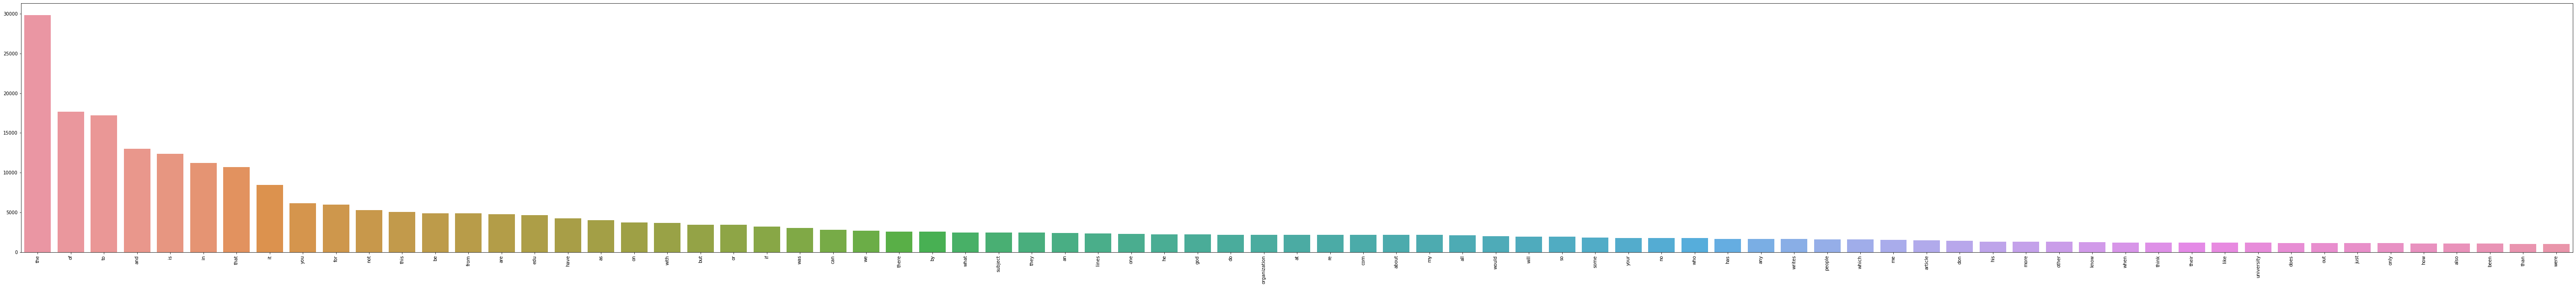

In [24]:
# we first zip the frequencies and features together to make sure it still matches to the right feature when we are sorting it.
zipped = zip(term_frequencies, count_vect.get_feature_names())
res = sorted(zipped, key = lambda x: x[0], reverse=True)
# then we take the result out and turn it back into a list
a, b = zip(*res)
a = list(a)
b = list(b)
plt.subplots(figsize=(100, 10))
# since there are too many features, so we only want to focus on those features that their frequencies are greater than 1000
for i in range(len(a)):
    if a[i] < 1000:
        Len = i
        break
print(Len)
g = sns.barplot(x = b[:Len],y = a[:Len])
g.set_xticklabels(b[:Len], rotation = 90);

**Exercise 15**

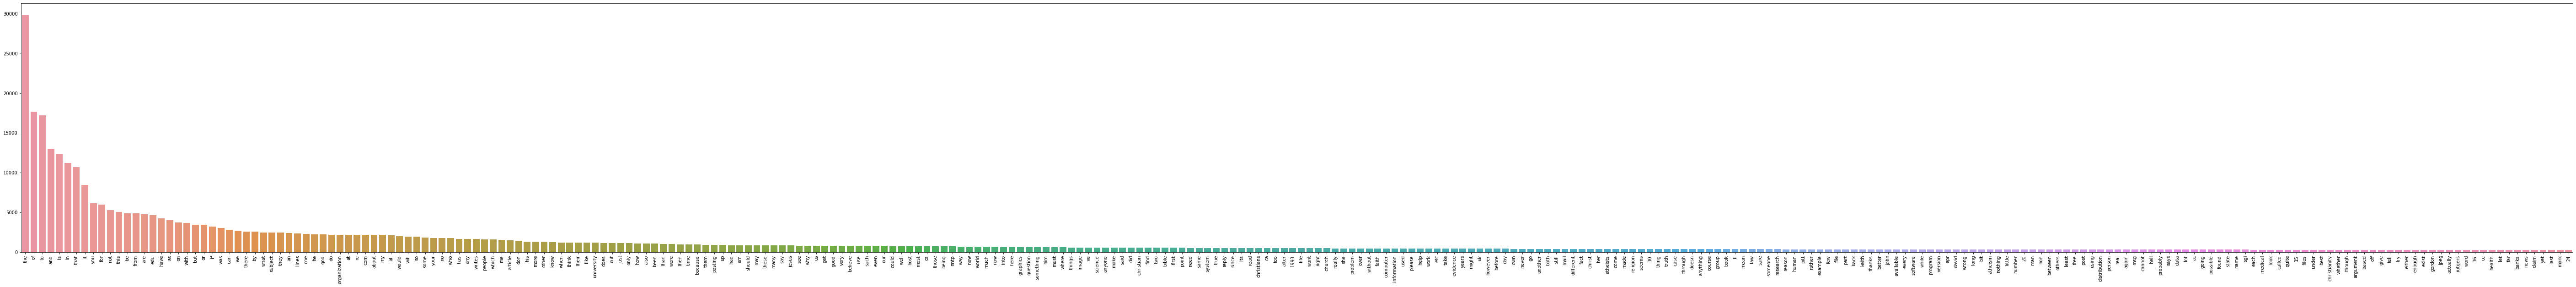

In [25]:
# again we first sort the frequencies
zipped = zip(term_frequencies, count_vect.get_feature_names())
res = sorted(zipped, key = lambda x: x[0], reverse=True)
a, b = zip(*res)
plt.subplots(figsize=(100, 10))
a = list(a)
b = list(b)
# then plot the first 300 features with the highest frequency
g = sns.barplot(x = b[:300],y = a[:300])
g.set_xticklabels(b[:300], rotation = 90);

**Exercise 16**

In [26]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
# we generate the binarization using the category_name column
mlb.fit(X.category_name)
X['bin_category'] = mlb.transform(X['category_name']).tolist()
X[0:9]
# we can see it actually works, and has same result as the one using category

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name                                           unigrams  \
0           comp.graphics  [From, :, sd345, @, city.ac.uk, (, Michael, Co...   
1           comp.graphics  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....   
2  soc.religion.christian  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...   
3  soc.religion.christian  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...   
4  soc.religion.christian  [From, :, stanly, @, grok11.columbiasc.ncr.com...   
5  soc.religion.christian  [From, :, vbv, @, lor.eeap.cwru.edu, (, Virgil...   
6  soc.religion.christian  [From, :, jodfishe, @, silver.ucs.indiana.edu,...   
7                 sci.med  [From, :, aldridge, @, netcom.com, (, Jacqueli...   
8                 sci.med  [From, :, geb, @, cs.pitt.edu, (, Gordon, Bank...   

   bin_category  
0  [0, 1, 0, 0]  
1  [0, 1, 0, 0]  
2  [0, 0, 0, 1]  
3  [0, 0, 0, 1]  
4  [0, 0, 0, 1]  
5  [0, 0, 0, 1]  
6  [0, 0, 0, 1]  
7  [0, 0, 1, 0]  
8  [0, 0, 1, 0]

## 2.

**Open the data and read it, then convert them into two list, sent and score**

In [27]:
# open three data
f1 = open('./sentiment labelled sentences/sentiment labelled sentences/amazon_cells_labelled.txt', 'r')
f2 = open('./sentiment labelled sentences/sentiment labelled sentences/imdb_labelled.txt', 'r', encoding="utf-8")
f3 = open('./sentiment labelled sentences/sentiment labelled sentences/yelp_labelled.txt', 'r')
# read them as a string
tmp1 = f1.read()
tmp2 = f2.read()
tmp3 = f3.read()
f1.close
f2.close
f3.close
# split each sentence and turn them into a list
tmp1 = tmp1.strip('\n').split('\n')
tmp2 = tmp2.strip('\n').split('\n')
tmp3 = tmp3.strip('\n').split('\n')
# create two empty list
sent = []
score = []
# split all sentences and score, then add them into sent and score list
for i in tmp1:
    tmp = i.split('\t')
    sent.append(tmp[0])
    score.append(tmp[1])
for i in tmp2:
    tmp = i.split('\t')
    sent.append(tmp[0])
    score.append(tmp[1])
for i in tmp3:
    tmp = i.split('\t')
    sent.append(tmp[0])
    score.append(tmp[1])

**Convert two lists into Pandas Dataframe**

In [28]:
import pandas as pd
X = pd.DataFrame(sent, columns= ['sentence'])
X['score'] = score
X[0:10]

sentence score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1
5  I have to jiggle the plug to get it to line up...     0
6  If you have several dozen or several hundred c...     0
7        If you are Razr owner...you must have this!     1
8                Needless to say, I wasted my money.     0
9                   What a waste of money and time!.     0

**Missing Values**

In [29]:
# check if there are missing values
import helpers.data_mining_helpers as dmh
print('The original X')
print('length of X : ',len(X))
print(X.isnull().apply(lambda x: dmh.check_missing_values(x)))
# since there is no missing value, we artificially add dummy data with no score into X
dummy_series = pd.Series(["dummy_record_with_no_score"], index=["sentence"])
X = X.append(dummy_series, ignore_index = True)
# check missing value again
print('--------------------------------------------------\nAfter adding one dummy series')
print('length of X : ',len(X))
print(X.isnull().apply(lambda x: dmh.check_missing_values(x)))
# add another dummy data with no sentence into X
dummy_dict = [{'score': 1}]
X = X.append(dummy_dict, ignore_index = True)
# check missing value again
print('--------------------------------------------------\nAfter adding one dummy dict')
print('length of X : ',len(X))
print(len(X))
print(X.isnull().apply(lambda x: dmh.check_missing_values(x)))
# remove the missing value
X.dropna(inplace=True)
# check the whole X again
print('--------------------------------------------------\nAfter removing the missing value')
print('length of X : ',len(X))
print(len(X))
print(X.isnull().apply(lambda x: dmh.check_missing_values(x)))

The original X
length of X :  3000
                             sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   0
--------------------------------------------------
After adding one dummy series
length of X :  3001
                             sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   0                                   1
--------------------------------------------------
After adding one dummy dict
length of X :  3002
3002
                             sentence                               score
0  The amoung of missing records is:   The amoung of missing records is: 
1                                   1                                   1
--------------------------------------------------
After removing the missing value
length of 

**Duplicate Data**

In [30]:
# check duplicate data
print(X.duplicated())
print('-------------------\nDuplicate number : ', sum(X.duplicated()))
# we can use a little for loop to print out duplicate data
for i in range(len(X.duplicated())):
    if X.duplicated()[i] == True:
        print(X[i:i+1])
# we can check duplicate data for particular column
print('-------------------\nDuplicate number of sentence : ', sum(X.duplicated('sentence')))
# since the score only has 0 or 1, apperantly we will have 2998 duplicates
print('-------------------\nDuplicate number of score : ', sum(X.duplicated('score')))
print('-------------------\nOriginal length of X', len(X))
# we delete all duplicate data
# But since this data is all about positive and negative sentences, we choose to keep the first occurrence for each duplicate
X.drop_duplicates(keep="first", inplace=True)
print('-------------------\nThe length of X after removing duplicates',len(X))

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool
-------------------
Duplicate number :  17
          sentence score
285  Great phone!.     1
         sentence score
407  Works great.     1
          sentence score
524  Works great!.     1
                    sentence score
543  Don't buy this product.     0
                                              sentence score
744  If you like a loud buzzing to override all you...     0
          sentence score
748  Does not fit.     0
                  sentence score
778  This is a great deal.     1
         sentence score
792  Great Phone.     1
                             sentence score
892  Excellent product for the price.     1
         sentence score
896  Great phone.     1
                              sentence score
1363  Definitely worth checking out.       1
                sentence score
1585  Not recomm

**Data Preprocessing**

                                               sentence score
1320             This is actually a very smart movie.       1
1199                        The film is way too long.       0
997                        Item Does Not Match Picture.     0
2920  Needless to say, I won't be going back anytime...     0
949                 I had to purchase a different case.     0
...                                                 ...   ...
262                                        Works great.     1
2488  It was attached to a gas station, and that is ...     0
1840  This was one of the worst films i have ever se...     0
590                 Sprint - terrible customer service.     0
1379  Lucy Bell is so much higher than this crap and...     0

[1000 rows x 2 columns]


Score count of X:
 0    1493
1    1490
Name: score, dtype: int64


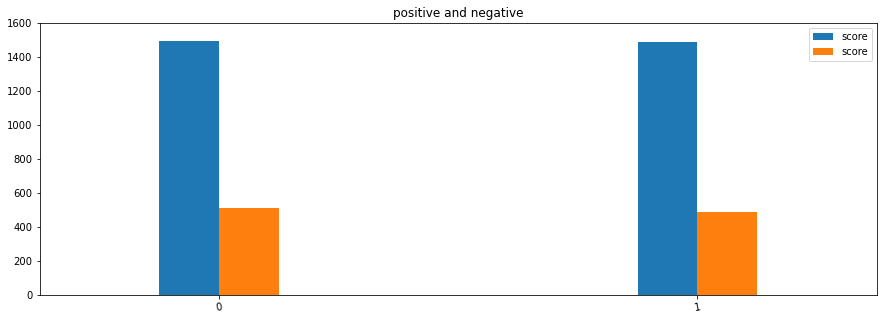

In [34]:
# randomly take 1000 sample data
X_sample = X.sample(n=1000)
print(X_sample)

import matplotlib.pyplot as plt
%matplotlib inline

print('\n\nScore count of X:\n', X.score.value_counts())
result_combined_df = pd.concat([X.score.value_counts(),
                                X_sample.score.value_counts()], axis=1).plot(kind = 'bar',
                                                                                     title = 'positive and negative',
                                                                                     ylim = [0, 1600], width = 0.25,        
                                                                                     rot = 10, fontsize = 10, figsize = (15,5))

**Feature**

In [35]:
import nltk
nltk.download('punkt')
# obtain unigrams for each text
X['unigrams'] = X['sentence'].apply(lambda x: dmh.tokenize_text(x))
print('Unigrams of first three sentences :\n', X[0:3]["unigrams"])
# we can see X has a new column 'unigrams'
print(X[0:3])

Unigrams of first three sentences :
 0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
Name: unigrams, dtype: object
                                            sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   

                                            unigrams  
0  [So, there, is, no, way, for, me, to, plug, it...  
1               [Good, case, ,, Excellent, value, .]  
2                      [Great, for, the, jawbone, .]  


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ccc87\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [36]:
from sklearn.feature_extraction.text import CountVectorizer

# transform sentences into a term-document matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.sentence)
analyze = count_vect.build_analyzer()
# try using analyzer to analyze first sentence in X
print('Unigrams of first sentence:', analyze(" ".join(list(X[:1].sentence))))
# check the shape of this matrix
print('----------------------------------\nThe shape of X_counts', X_counts.shape)
# show feature terms
print('First ten features:\n', count_vect.get_feature_names()[0:10])
# we convert from sparse array to normal array
print('First five sentence with first 100 features\n',X_counts[0:5, 0:100].toarray())

import numpy as np
tmp = np.where(X_counts[0:1, :].toarray() == 1)

print('The features occur in first sentence:')
for i in range(len(tmp[1])):
    print(count_vect.get_feature_names()[tmp[1][i]])

Unigrams of first sentence: ['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']
----------------------------------
The shape of X_counts (2983, 5155)
First ten features:
 ['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
First five sentence with first 100 features
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 

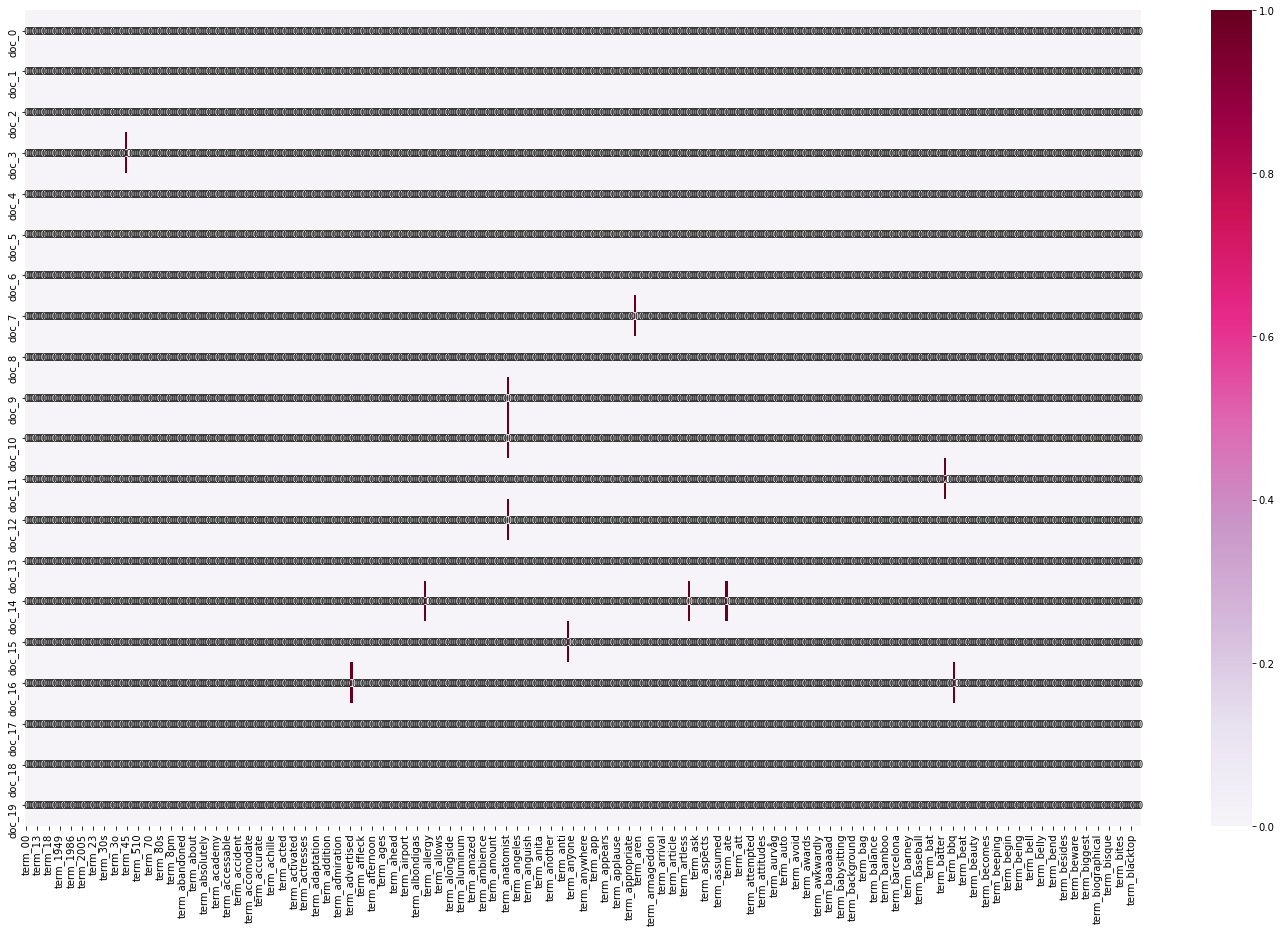

In [37]:
# we only do first 20 sentences and first 500 features
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:500]]
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
plot_z = X_counts[0:20, 0:500].toarray()
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(25, 15))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

The shape of X_reduced:  (2983, 2)


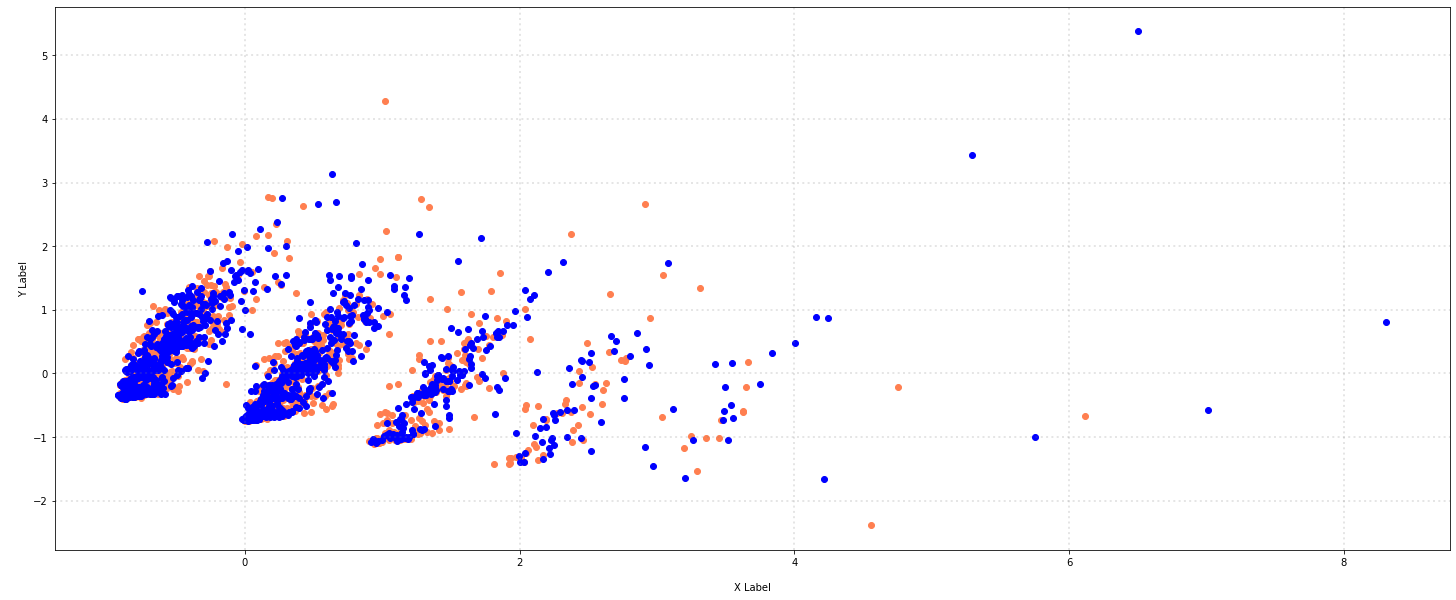

In [38]:
from sklearn.decomposition import PCA
# reduce our data into 2 dimensions
X_reduced = PCA(n_components = 2).fit_transform(X_counts.toarray())
print('The shape of X_reduced: ', X_reduced.shape)
# set two color
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

# plot all score 0 points and score 1 points
for c, s in zip(col, ['0','1']):
    xs = X_reduced[X['score'] == s].T[0]
    ys = X_reduced[X['score'] == s].T[1]
    ax.scatter(xs, ys, c = c, marker='o')


ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

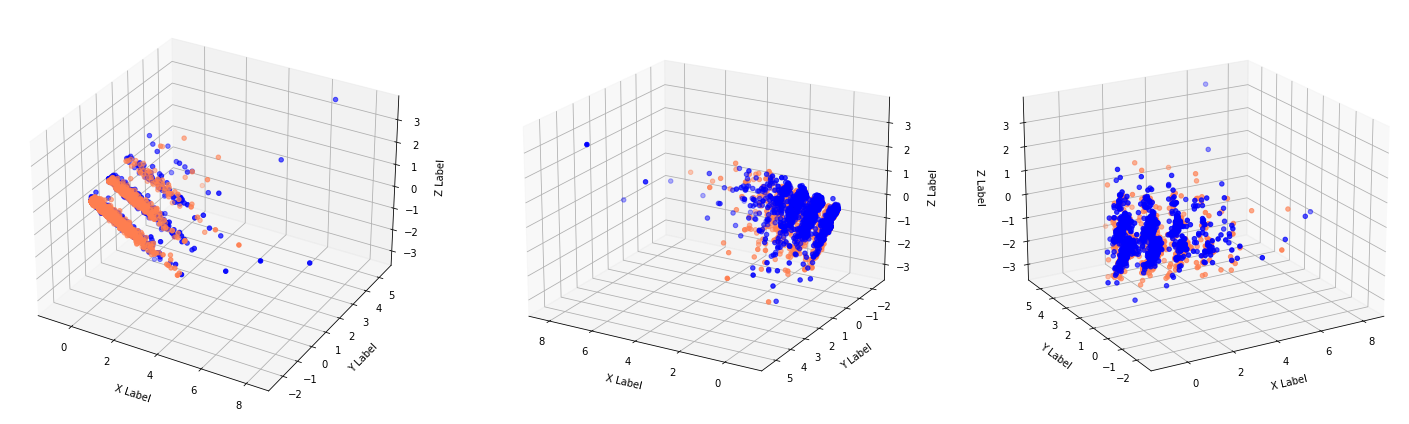

In [39]:
# look it from 3D
from mpl_toolkits.mplot3d import Axes3D
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
X_reduced.shape
col = ['coral', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(1, 3, 1, projection='3d')
ay = fig.add_subplot(1, 3, 2, projection='3d')
az = fig.add_subplot(1, 3, 3, projection='3d')

for c, s in zip(col, ['0', '1']):
    xs = X_reduced[X['score'] == s].T[0]
    ys = X_reduced[X['score'] == s].T[1]
    zs = X_reduced[X['score'] == s].T[2]
   
    ax.scatter(xs, ys, zs, c = c, marker='o')
    ay.scatter(xs, ys, zs, c = c, marker='o')
    az.scatter(xs, ys, zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ay.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ay.set_xlabel('\nX Label')
ay.set_ylabel('\nY Label')
ay.set_zlabel('\nZ Label')
az.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
az.set_xlabel('\nX Label')
az.set_ylabel('\nY Label')
az.set_zlabel('\nZ Label')

ay.view_init(elev=20., azim=120)
az.view_init(elev=20., azim=240)
plt.show()

In [40]:
term_frequencies = []
# use for loop to count term
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

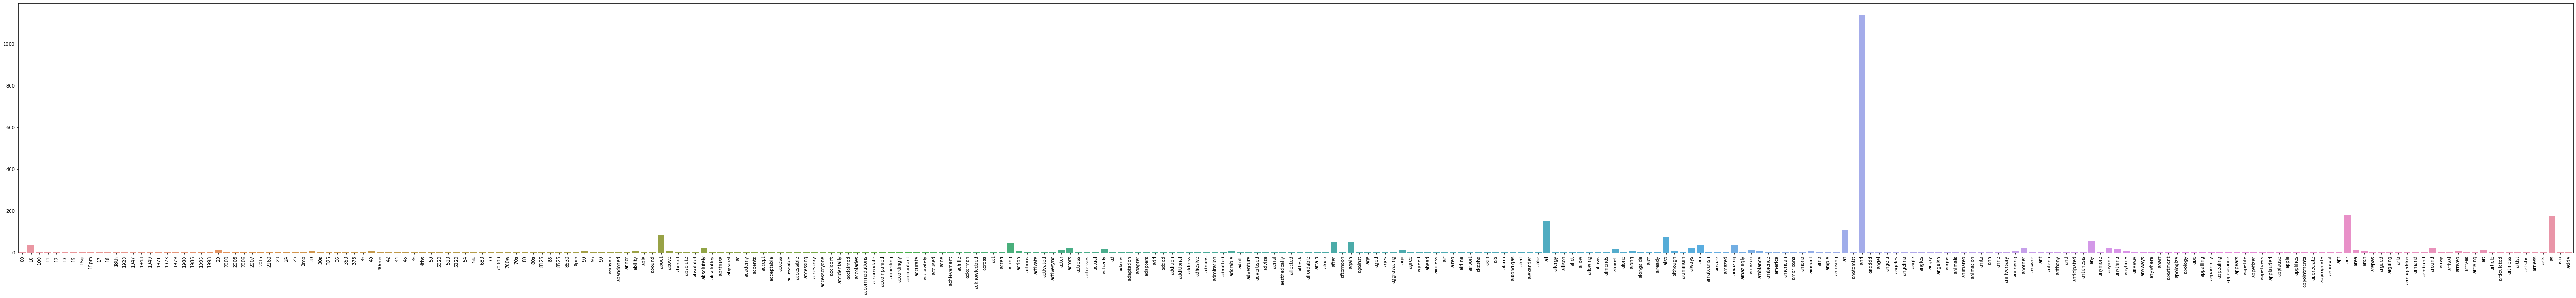

In [41]:
# plot first 300 feature's frequency into barchart
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [13]:
# We can use plotly to have a nicer interactive visualizarion
import plotly.express as px
fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
fig.show()

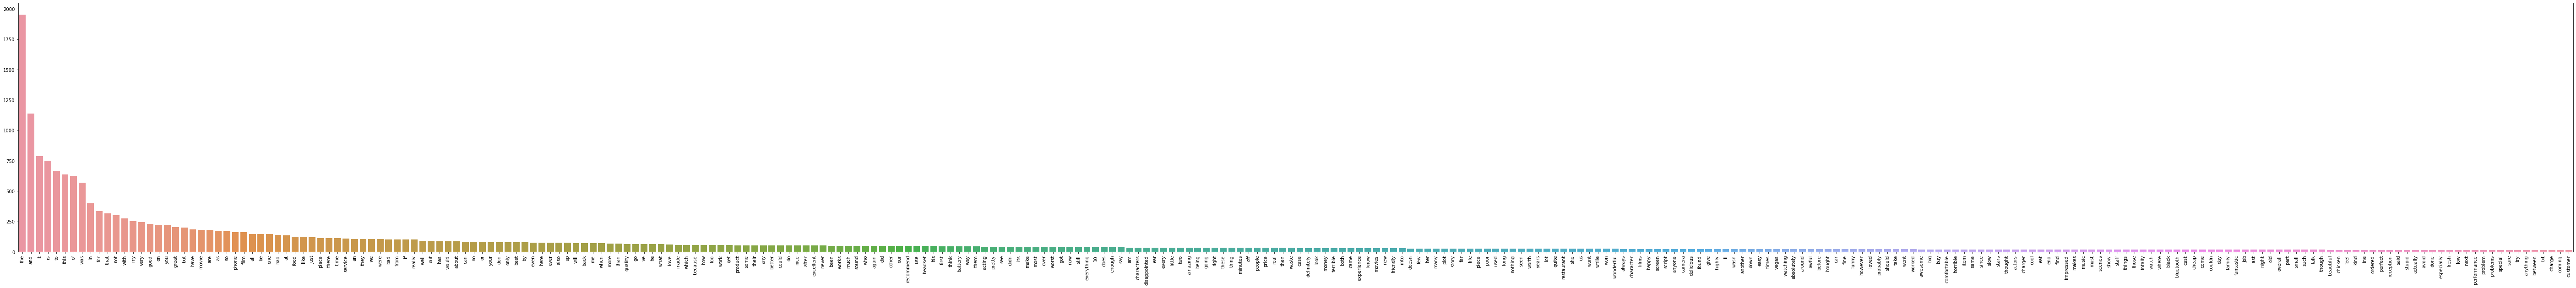

In [42]:
# Also we can plot first 300 features with the highest frequency
# we first zip the frequencies and features together
zipped = zip(term_frequencies, count_vect.get_feature_names())
# then sorted
res = sorted(zipped, key = lambda x: x[0], reverse=True)
a, b = zip(*res)
plt.subplots(figsize=(100, 10))
# turn both of them back to list
a = list(a)
b = list(b)
# plot
g = sns.barplot(x = b[:300],y = a[:300])
g.set_xticklabels(b[:300], rotation = 90);

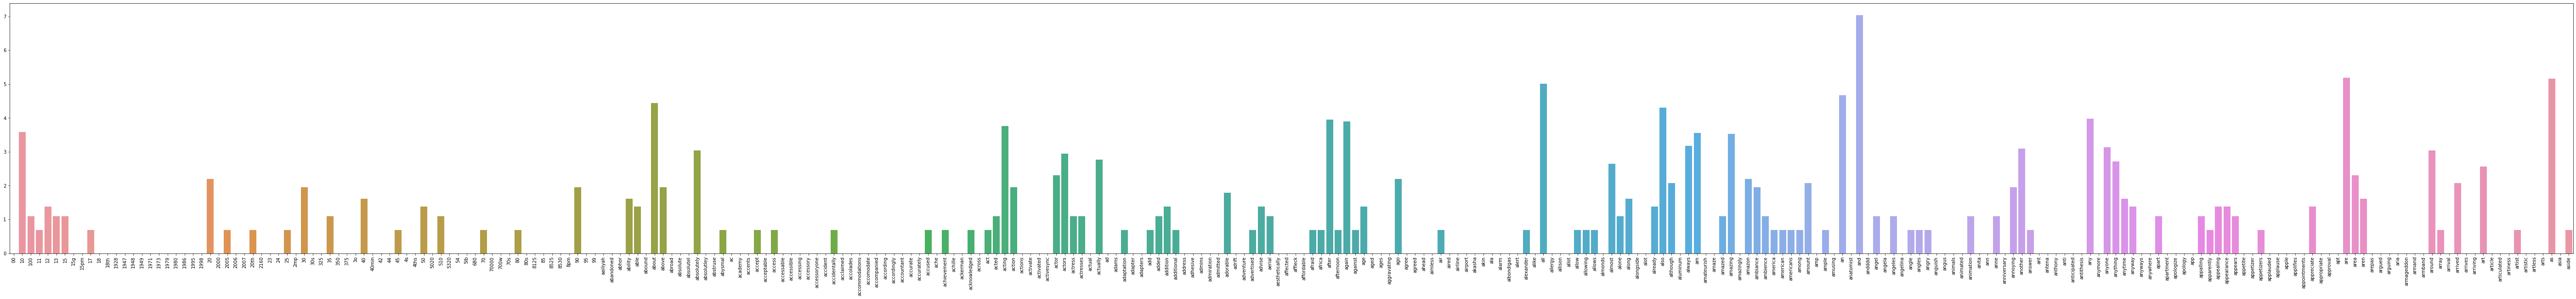

In [43]:
# use log in math library on our data, so that all number will get closer to each other
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

In [44]:
# transfer score into binary attributes
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.score)
X['bin_score'] = mlb.transform(X['score']).tolist()
print(X[0:9])

                                            sentence score  \
0  So there is no way for me to plug it in here i...     0   
1                        Good case, Excellent value.     1   
2                             Great for the jawbone.     1   
3  Tied to charger for conversations lasting more...     0   
4                                  The mic is great.     1   
5  I have to jiggle the plug to get it to line up...     0   
6  If you have several dozen or several hundred c...     0   
7        If you are Razr owner...you must have this!     1   
8                Needless to say, I wasted my money.     0   

                                            unigrams bin_score  
0  [So, there, is, no, way, for, me, to, plug, it...       [0]  
1               [Good, case, ,, Excellent, value, .]       [1]  
2                      [Great, for, the, jawbone, .]       [1]  
3  [Tied, to, charger, for, conversations, lastin...       [0]  
4                           [The, mic, is, great, .]  

**Data Exploration**

In [45]:
# retrieve 3 sentences for a random record, here we just indexed at 50, 100 and 150
document_to_transform_1 = []
random_record_1 = X.iloc[50]
random_record_1 = random_record_1['sentence']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['sentence']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[150]
random_record_3 = random_record_3['sentence']
document_to_transform_3.append(random_record_3)

print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

["Not loud enough and doesn't turn on like it should."]
['Integrated seamlessly with the Motorola RAZR phone.']
['I Was Hoping for More.']
Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


## 3.

**We look forward to each sentence, if this sentence is positive, then all features of the unigrams in this sentence get 1 point, otherwise, minus 1 point.  
Through this method, we can see which feature has higher chance to make the sentence become positive or negative.**

In [46]:
# tmp1 is the feature list, and tmp2 is the corresponding counting list for each feature
tmp1 = list(count_vect.get_feature_names())
tmp2 = list(count_vect.get_feature_names())
# set counting list to initial 0
for i in range(len(tmp2)):
    tmp2[i] = 0
# use three stage for loop to go through all unigrams in all sentence
for i in range(len(X)):
    if list(X[i:i+1]["score"])[0] == '1':
        for j in list(X[i:i+1]["unigrams"])[0]:
            for k in range(len(tmp1)):
                if j == tmp1[k]:
                    tmp2[k] = tmp2[k] + 1
                    break
    else:
        for j in list(X[i:i+1]["unigrams"])[0]:
            for k in range(len(tmp1)):
                if j == tmp1[k]:
                    tmp2[k] = tmp2[k] - 1
                    break
# show first 100 features
print(tmp1[0:100])                    
print(tmp2[0:100])
        

['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17', '18', '18th', '1928', '1947', '1948', '1949', '1971', '1973', '1979', '1980', '1986', '1995', '1998', '20', '2000', '2005', '2006', '2007', '20th', '2160', '23', '24', '25', '2mp', '30', '30s', '325', '35', '350', '375', '3o', '40', '40min', '42', '44', '45', '4s', '4ths', '50', '5020', '510', '5320', '54', '5lb', '680', '70', '70000', '700w', '70s', '80', '80s', '8125', '85', '8525', '8530', '8pm', '90', '95', '99', 'aailiyah', 'abandoned', 'abhor', 'ability', 'able', 'abound', 'about', 'above', 'abroad', 'absolute', 'absolutel', 'absolutely', 'absolutley', 'abstruse', 'abysmal', 'ac', 'academy', 'accents', 'accept', 'acceptable', 'access', 'accessable', 'accessible', 'accessing', 'accessory', 'accessoryone', 'accident', 'accidentally', 'acclaimed', 'accolades', 'accommodations']
[0, 5, 1, -1, -2, -1, 1, 0, 0, -1, 1, 1, 1, 1, -1, 1, -1, 1, -1, 1, -1, -1, -1, -2, 1, 2, 1, 1, 0, -1, 1, 1, 2, 0, -5, -1, 1, -3, 1, -1, -1, -1

**We plot the first 50 most positive features into a barplot**

and 211
great 134
good 103
is 77
the 52
very 51
film 45
love 42
with 42
well 37


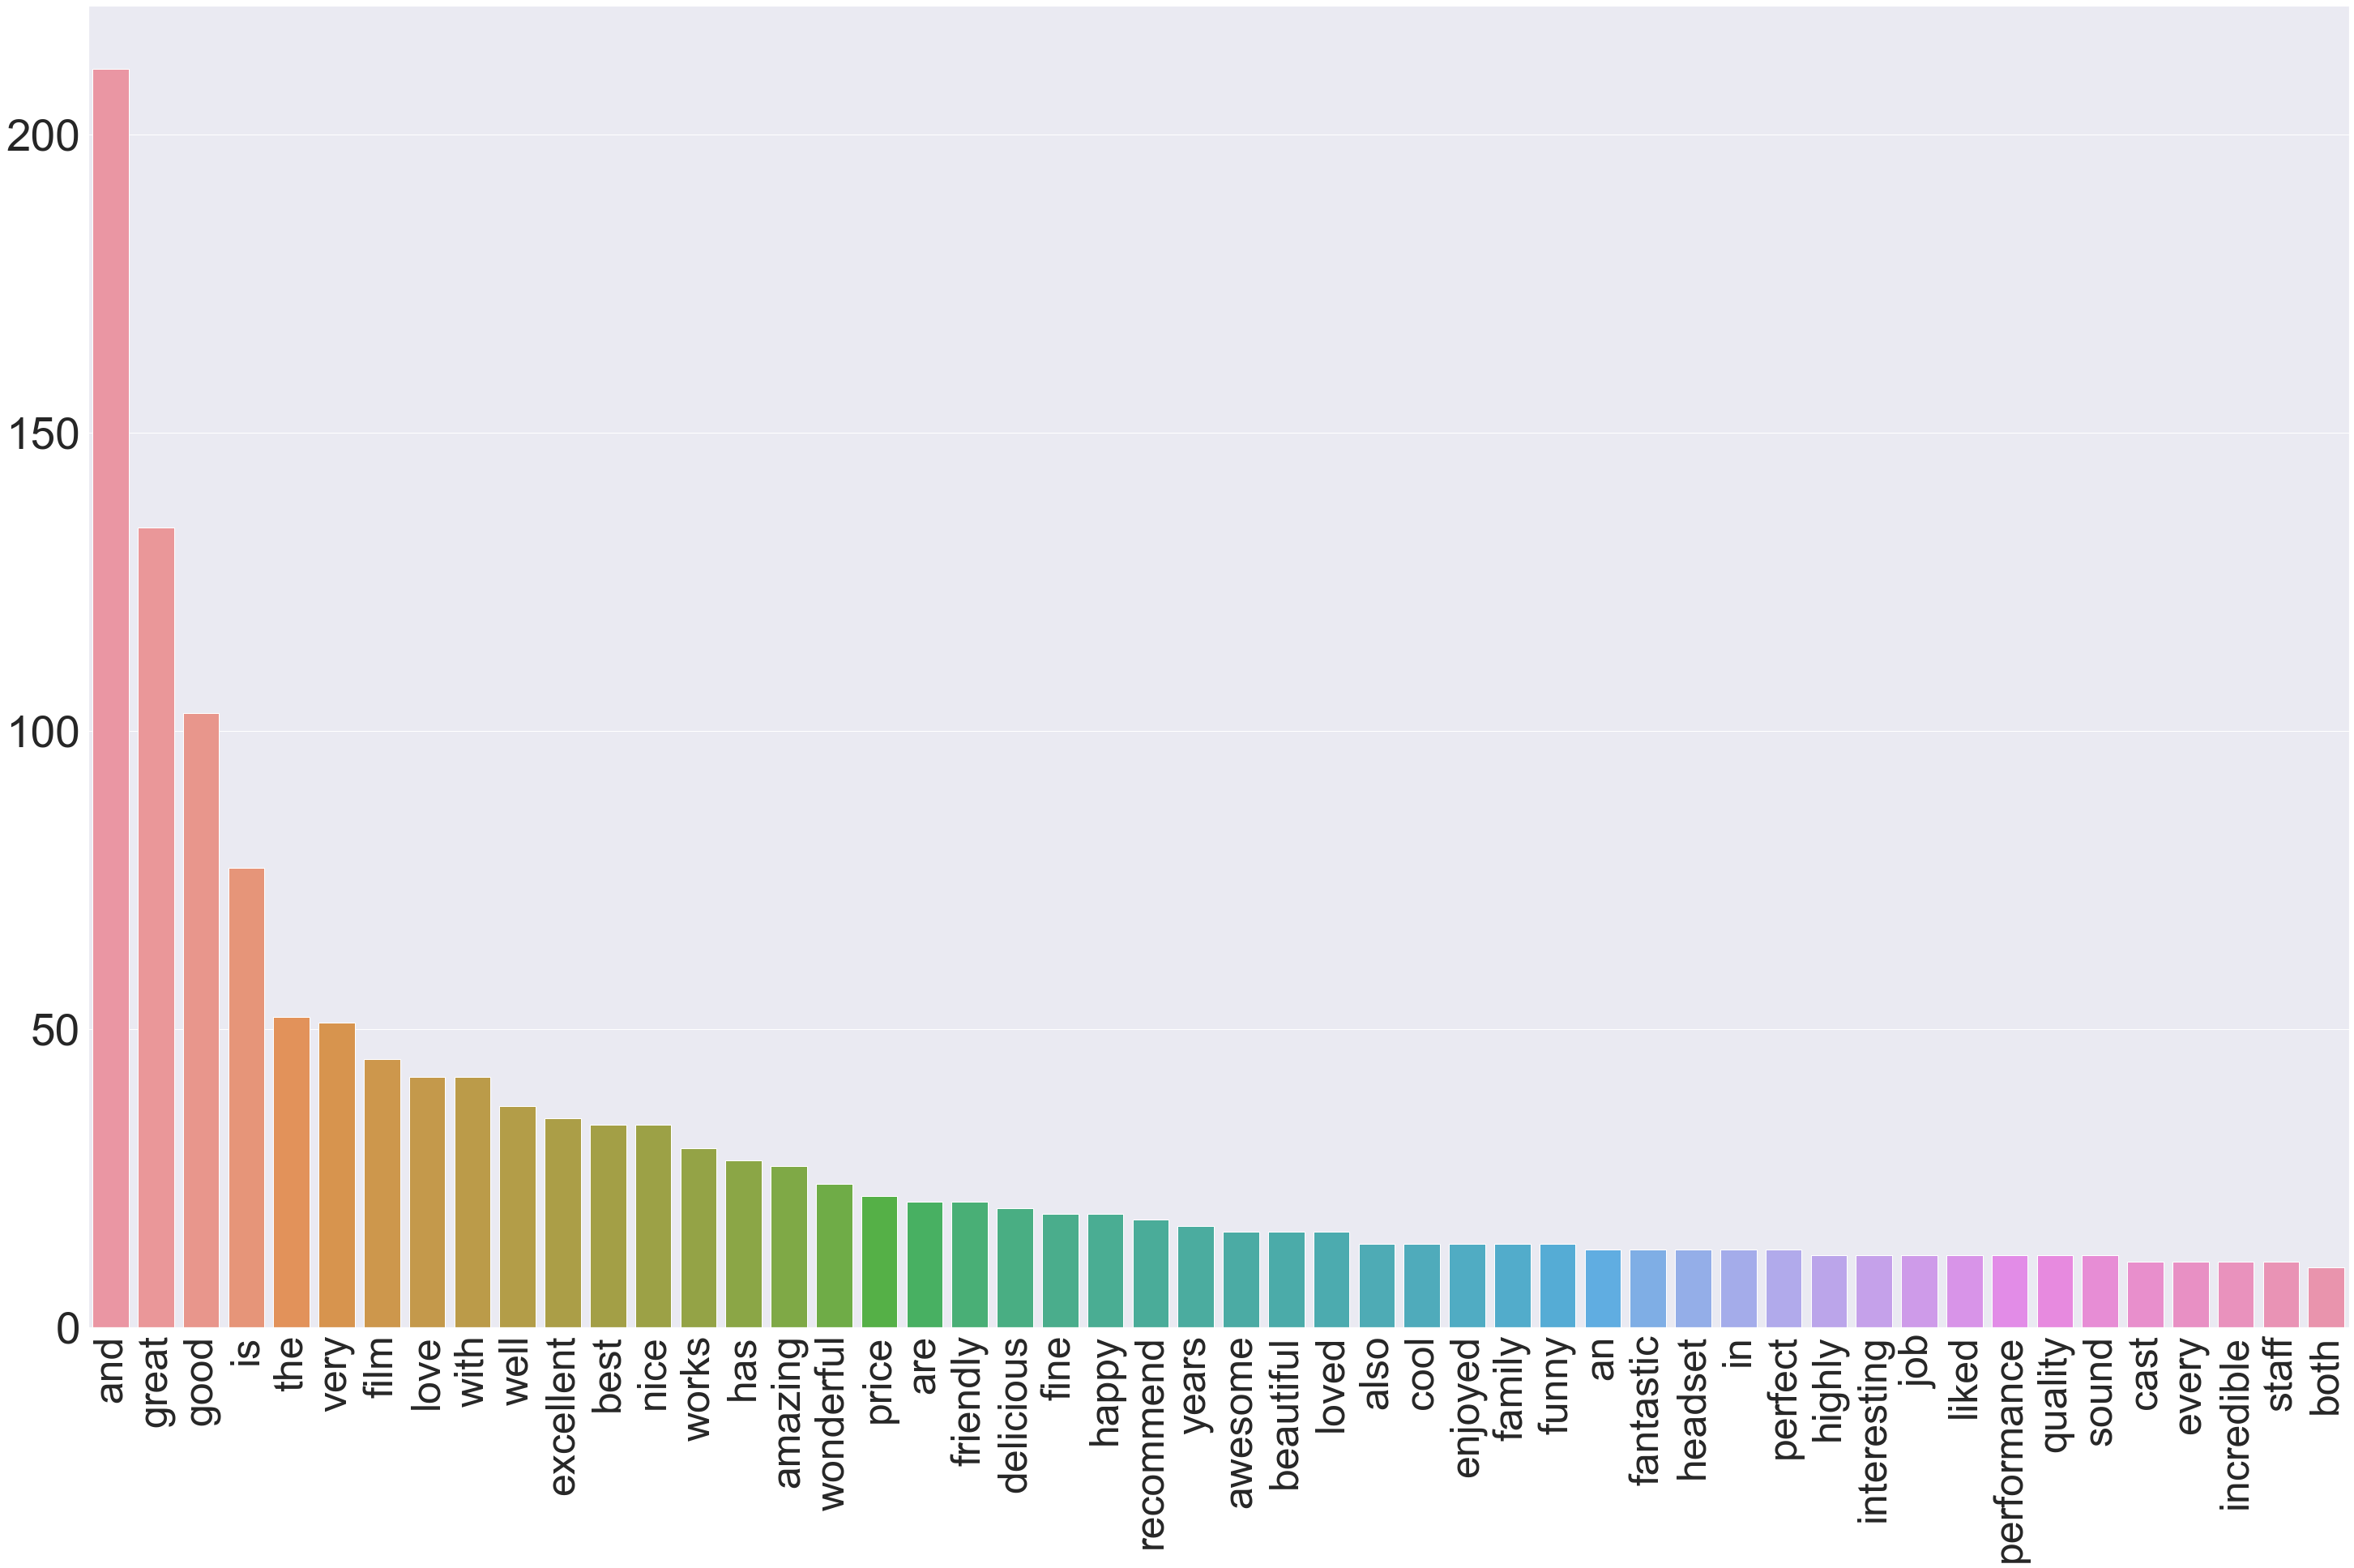

In [41]:
# first zip together
zipped = zip(tmp2, tmp1)
# then sorted
res = sorted(zipped, key = lambda x: x[0], reverse=True)
tmp2, tmp1 = zip(*res)
plt.subplots(figsize=(50, 30))
# turn both of them back to list
tmp2 = list(tmp2)
tmp1 = list(tmp1)
# plot
sns.set(font_scale = 10)
g = sns.barplot(x = tmp1[:50],y = tmp2[:50])
g.set_xticklabels(tmp1[:50], rotation = 90, fontsize = 50);
# print first 10 features with highest score
for x, y in zip(tmp1[0:10], tmp2[0:10]):
    print(x, y)

**We plot the first 50 most negative features into a barplot**

not -160
bad -82
was -71
to -51
that -46
it -39
did -38
do -38
at -37
would -36


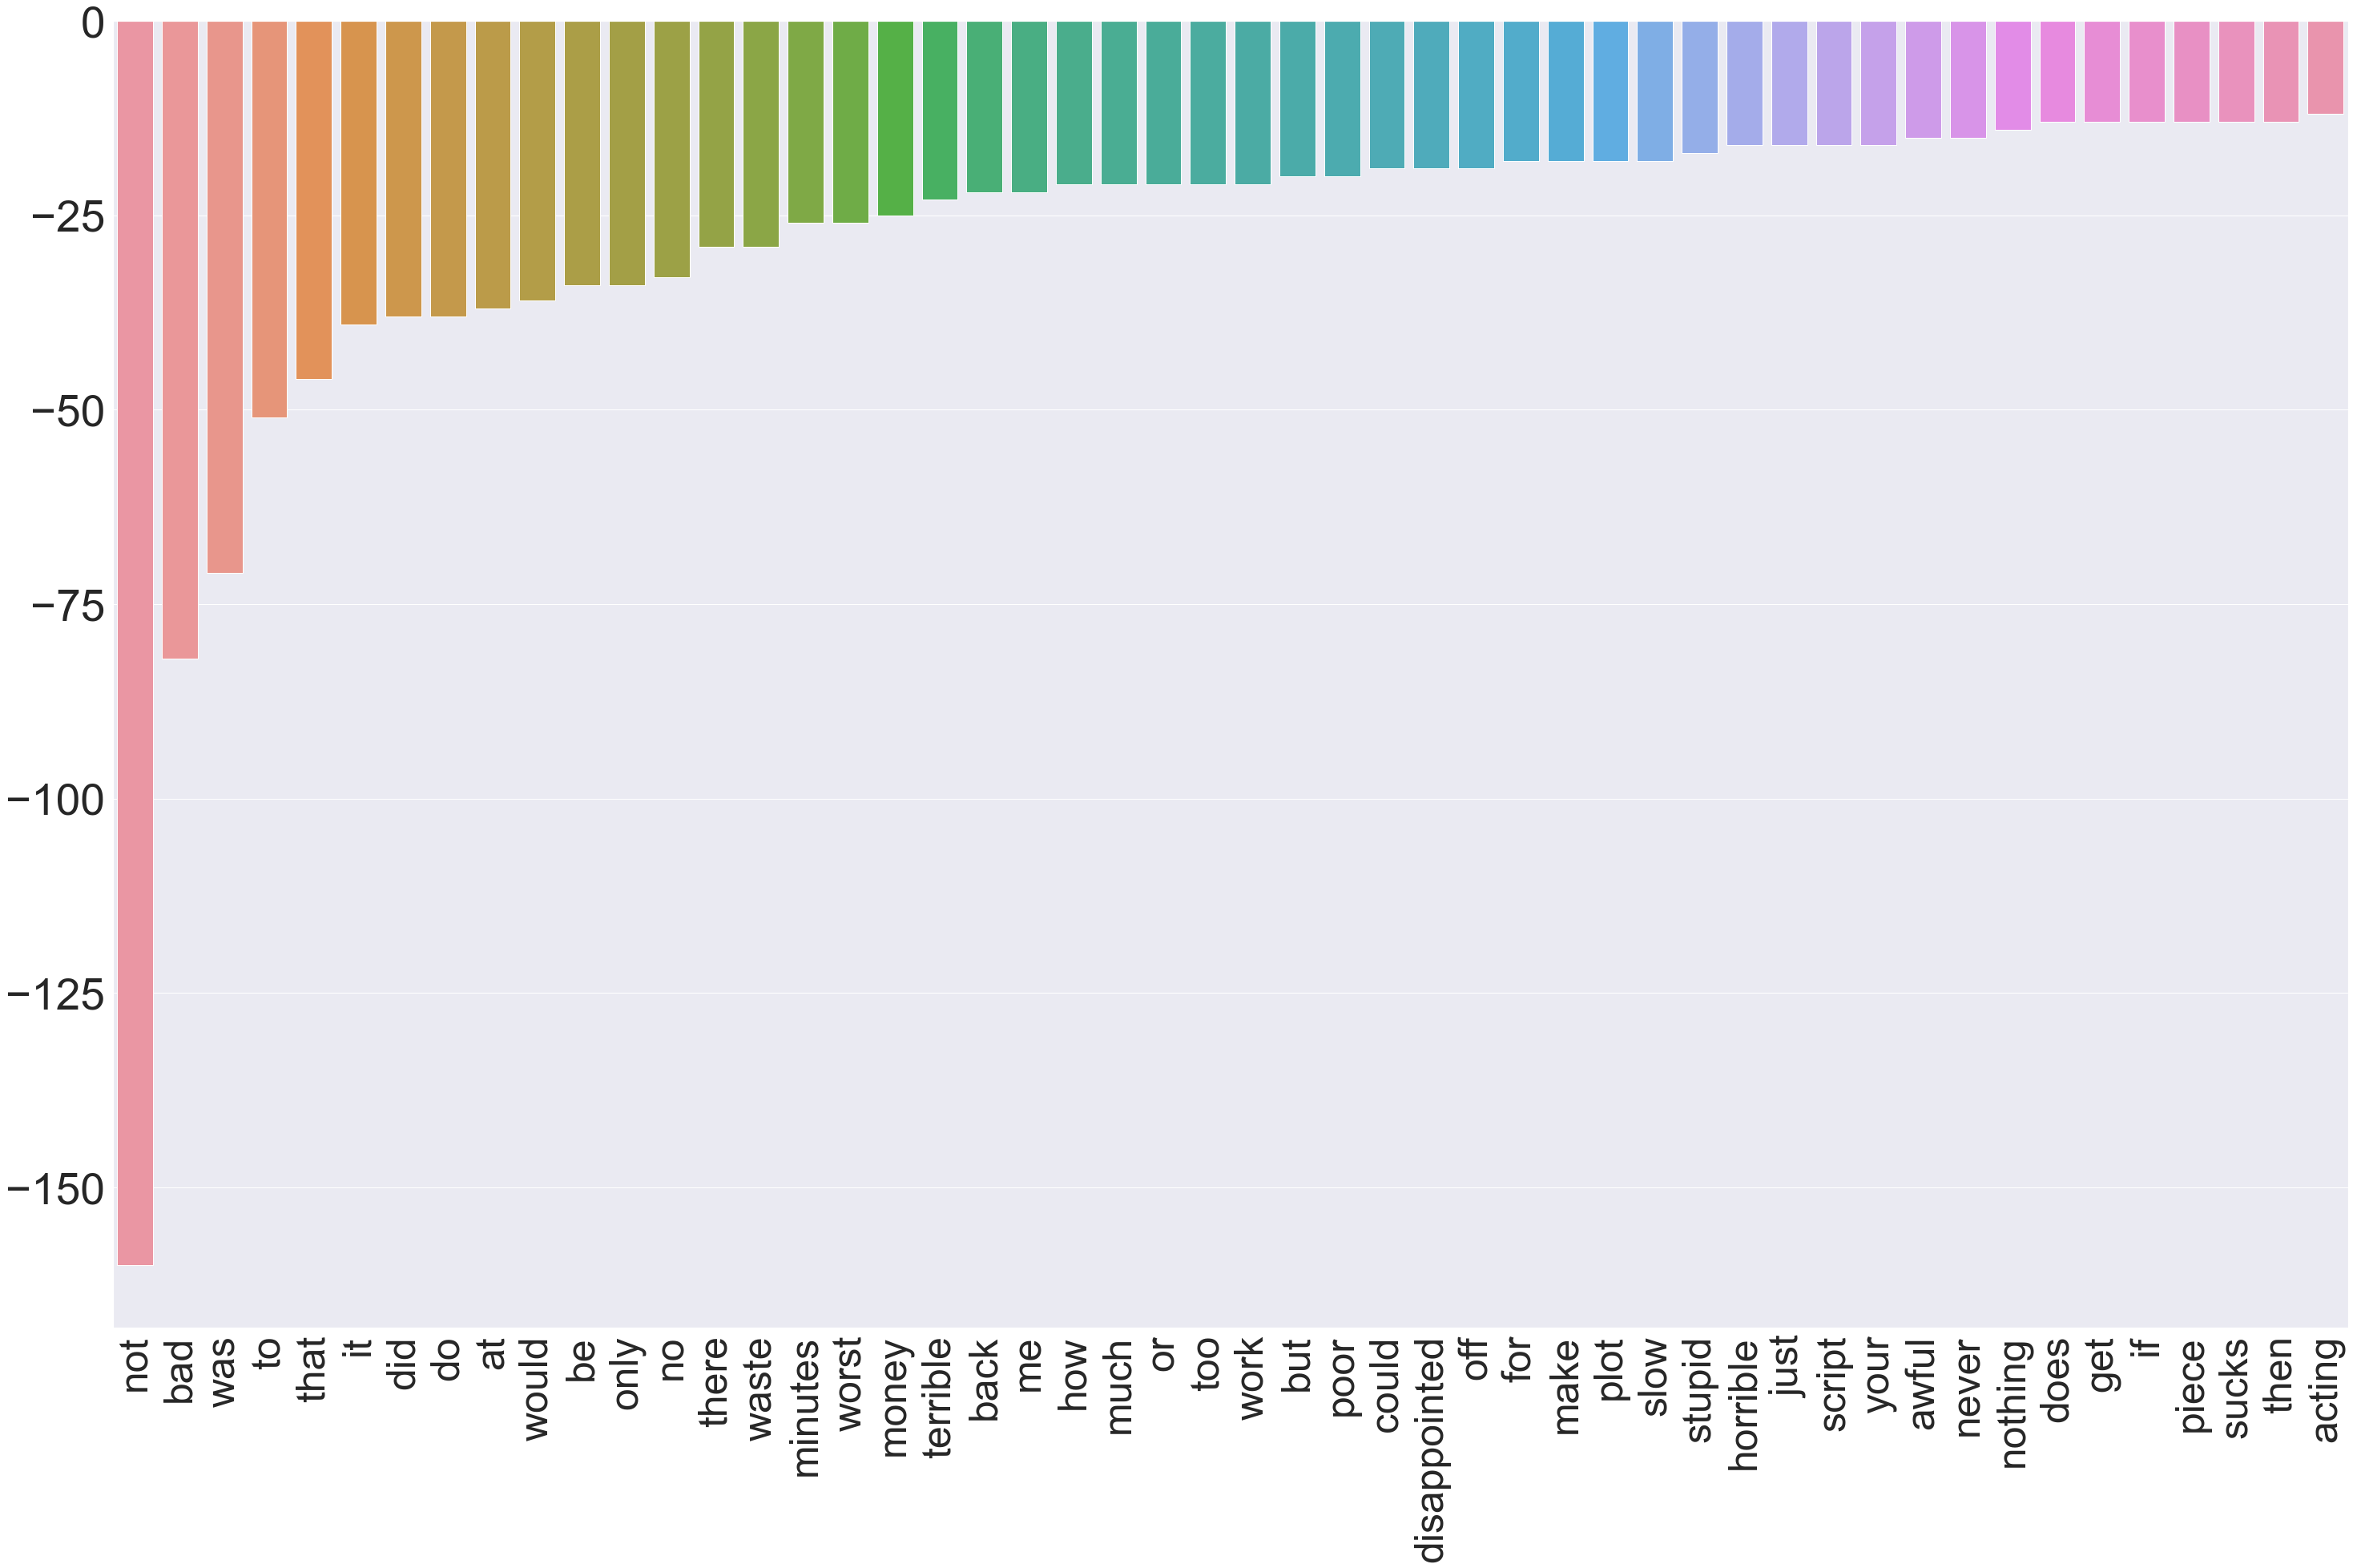

In [45]:
# first zip together
zipped = zip(tmp2, tmp1)
# then sorted
res = sorted(zipped, key = lambda x: x[0], reverse=False)
tmp2, tmp1 = zip(*res)
plt.subplots(figsize=(50, 30))
# turn both of them back to list
tmp2 = list(tmp2)
tmp1 = list(tmp1)
# plot
sns.set(font_scale = 10)
g = sns.barplot(x = tmp1[:50],y = tmp2[:50])
g.set_xticklabels(tmp1[:50], rotation = 90, fontsize = 50);
# print first 10 features with lowest score
for x, y in zip(tmp1[0:10], tmp2[0:10]):
    print(x, y)

In [46]:
# import TfidVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
# generate TF-IDF features
TFID = vectorizer.fit_transform(X.sentence)
print(TFID.shape)
print(TFID[0:10])
tfid = []
for j in range(0,TFID.shape[1]):
    tfid.append(sum(TFID[:,j].toarray()))
print(tfid[1013])

(2983, 5155)
  (0, 1013)	0.39845543988934873
  (0, 647)	0.2233655373587691
  (0, 1982)	0.2314910330235545
  (0, 4793)	0.3319671168188344
  (0, 4835)	0.2754374241479848
  (0, 4531)	0.08660987696634037
  (0, 2158)	0.22274667474668547
  (0, 2314)	0.29538734318239734
  (0, 2432)	0.11967447562998453
  (0, 3387)	0.30868158568324194
  (0, 4609)	0.12743956571028017
  (0, 2809)	0.2286268276414034
  (0, 1829)	0.15641232030594823
  (0, 4987)	0.24912754996231995
  (0, 3043)	0.2233655373587691
  (0, 2427)	0.12068879835601415
  (0, 4545)	0.20758518394408282
  (0, 4161)	0.1873972955866557
  (1, 4861)	0.633627682893175
  (1, 1603)	0.47208678028809276
  (1, 713)	0.512627326445873
  (1, 1993)	0.3359512695758188
  (2, 2449)	0.8223576509783525
  (2, 2023)	0.40205777854454006
  (2, 4531)	0.1950221671536334
  :	:
  (6, 5138)	0.13464197626555388
  (6, 2282)	0.1544982062309688
  (6, 2113)	0.13464197626555388
  (6, 647)	0.1644249406003937
  (6, 4531)	0.06375568963767383
  (7, 4558)	0.1630882491808145
  (7, 298

In [47]:
# import naive_bayes
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split

# define train set and test set using TF-IDF features
X_train, X_test, Y_train, Y_test = train_test_split(TFID, X.score, test_size=0.25)

# 
bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.8270777479892761

In [48]:
# define train set and test set using word frequency features
X_train, X_test, Y_train, Y_test = train_test_split(X_counts, X.score, test_size=0.25)

bnb = BernoulliNB(binarize=0.0)
bnb.fit(X_train, Y_train)
bnb.score(X_test, Y_test)

0.7989276139410187

**We sort term-frequencies and TFID-frequencies and print first 100 features wiith the highest frequency**

In [49]:
# zip features and frequencies together
zipped = zip(term_frequencies, count_vect.get_feature_names())
# then sorted
res = sorted(zipped, key = lambda x: x[0], reverse=True)
a, b = zip(*res)
# turn b back to list
b = list(b)
print(b[0:100])
# zip features and frequencies together
zipped = zip(tfid, count_vect.get_feature_names())
# then sorted
res = sorted(zipped, key = lambda x: x[0], reverse=True)
a, b = zip(*res)
# turn b back to list
b = list(b)
print(b[0:100])

['the', 'and', 'it', 'is', 'to', 'this', 'of', 'was', 'in', 'for', 'that', 'not', 'with', 'my', 'very', 'good', 'on', 'you', 'great', 'but', 'have', 'movie', 'are', 'as', 'so', 'phone', 'film', 'all', 'be', 'one', 'had', 'at', 'food', 'like', 'just', 'place', 'there', 'time', 'service', 'an', 'they', 'we', 'were', 'bad', 'from', 'if', 'really', 'well', 'out', 'has', 'would', 'about', 'can', 'no', 'or', 'your', 'don', 'only', 'best', 'by', 'even', 'here', 'ever', 'also', 'up', 'will', 'back', 'me', 'when', 'more', 'than', 'quality', 'go', 've', 'he', 'what', 'love', 'made', 'which', 'because', 'how', 'too', 'work', 'get', 'product', 'some', 'their', 'any', 'better', 'could', 'do', 'nice', 'after', 'excellent', 'never', 'been', 'works', 'much', 'sound', 'who']
['the', 'and', 'it', 'is', 'this', 'was', 'to', 'of', 'not', 'in', 'great', 'good', 'very', 'for', 'that', 'with', 'my', 'you', 'phone', 'on', 'movie', 'so', 'service', 'are', 'but', 'food', 'have', 'film', 'as', 'all', 'be', 'bad'

**We can see there are differences between two lists, since tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.  
But Word frequencies just count the number of times each term occurs in each document; the number of times a term occurs in a document is called its term frequency.  
So we can see in TFID, the word not, great, good shows up earlier than in term_frequencies, this is due to the reason above that TFID decreases the frequency that some words appear too frequently.(may be some prepositions or articles)**

## 4.

In the lab, since all the text are news, is has 35788 features, which is quite large. It is actually very inefficent when doing works on features and data, since it takes a long time to compute. What we can do, is maybe delete those useless words that we already know are meaningless and do nothing help on depending categories, such as the starting word 'From' of every news, and 'tel'. Also, maybe we can extract the eamil address(not really sure) after 'From', and telephone numbers after 'tel', and do some other works on it. Since some reporter may just focus on some particular topic.